This notebook shows how the simulations in Figure 1 were generated.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skbio.stats.composition import clr, perturb
import pandas as pd
from biom import load_table
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex

from skbio.stats.composition import clr, centralize, closure
import matplotlib.colors as colors
from scipy.stats import ttest_rel, wilcoxon, ttest_ind
from functools import partial
from scipy.stats import pearsonr, linregress

%matplotlib inline

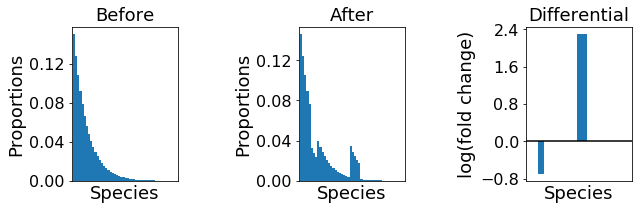

In [2]:
x = np.linspace(0, 2)
y = np.exp(-x*4)
y = y / y.sum()
dx = x[1]-x[0]


g1 = 5
g2 = 3
g3 = 15
g4 = 5
g5 = len(x) - g1 - g2 - g3 - g4

p = np.array([1] * g1 + [0.5]*g2 + [1] * g3 + [10] * g4 + [1] * g5)

z = perturb(y, p)

labelsize=18
ticksize=16

fig, ax = plt.subplots(1, 3, figsize=(9, 3))
ax[0].bar(x+dx, y, dx)
ax[0].set_xlim([0, 2])
ax[0].set_xticks([])
ax[0].set_title('Before', fontsize=labelsize)
ax[0].set_xlabel('Species', fontsize=labelsize)
ax[0].set_ylabel('Proportions', fontsize=labelsize)
ax[0].yaxis.set_major_locator(plt.MaxNLocator(4))
ax[0].xaxis.set_tick_params(labelsize=ticksize)
ax[0].yaxis.set_tick_params(labelsize=ticksize)

ax[2].bar(x+dx, np.log(p), dx)
ax[2].set_xlim([0, 2])
ax[2].set_xticks([])
ax[2].plot(x, np.zeros(len(x)), 'k')
ax[2].set_title('Differential', fontsize=labelsize)
ax[2].set_xlabel('Species', fontsize=labelsize)
ax[2].set_ylabel('log(fold change)', fontsize=labelsize)
ax[2].yaxis.set_major_locator(plt.MaxNLocator(5))
ax[2].xaxis.set_tick_params(labelsize=ticksize)
ax[2].yaxis.set_tick_params(labelsize=ticksize)

ax[1].bar(x+dx, z, dx)
ax[1].set_xlim([0, 2])
ax[1].set_xticks([])
ax[1].set_title('After', fontsize=labelsize)
ax[1].set_xlabel('Species', fontsize=labelsize)
ax[1].set_ylabel('Proportions', fontsize=labelsize)
ax[1].yaxis.set_major_locator(plt.MaxNLocator(4))
ax[1].xaxis.set_tick_params(labelsize=ticksize)
ax[1].yaxis.set_tick_params(labelsize=ticksize)

plt.tight_layout(pad=1, w_pad=5.0, h_pad=1)

plt.savefig('../figures/ranks.png')
plt.savefig('../figures/ranks.pdf')

Simulation

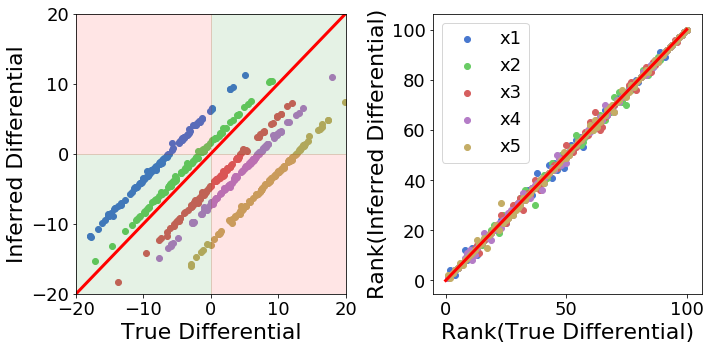

In [7]:
import matplotlib.patches as patches

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
data = pd.read_table('../data/sim_data.tsv', sep=' ')

meande = data['Mean DE'].unique()
colors = dict(zip(meande, sns.color_palette("muted", 5)))
de = dict(zip(meande, [5.4, 10, 13, 18, 23]))

t = 'g'
f = 'r'

labelsize = 18
fontsize = 22

rect = patches.Rectangle((-20, -20), 20, 20,
                         linewidth=1, edgecolor=t, facecolor=t, alpha=0.1)
ax[0].add_patch(rect)

rect = patches.Rectangle((0, 0), 20, 20,
                         linewidth=1, edgecolor=t, facecolor=t, alpha=0.1)
ax[0].add_patch(rect)

rect = patches.Rectangle((-20, 0), 20, 20,
                         linewidth=1, edgecolor=f, facecolor=f, alpha=0.1)
ax[0].add_patch(rect)

rect = patches.Rectangle((0, -20), 20, 20,
                         linewidth=1, edgecolor=f, facecolor=f, alpha=0.1)
ax[0].add_patch(rect)

ax[0].set_xlim([-20, 20])
ax[0].set_ylim([-20, 20])

for i in meande:
    d = data.loc[data['Mean DE'] == i]
    ax[0].scatter(d['V1'], d['de.fit'], c=colors[i])
    
ax[0].plot(np.linspace(-20, 20),
           np.linspace(-20, 20), 'r', lw=3)    
    
letters = ['0', 'x1', 'x2', 'x3', 'x4', 'x5']
for i in meande:
    d = data.loc[data['Mean DE'] == i]
    ax[1].scatter(d['rankV1'], d['rankde.fit'], 
                  c=colors[i], label=letters[i])

ax[1].plot(np.linspace(0, 100),
           np.linspace(0, 100), 'r', lw=3)        


ax[0].xaxis.set_tick_params(labelsize=labelsize)
ax[0].yaxis.set_tick_params(labelsize=labelsize)
ax[0].set_xlabel('True Differential', fontsize=fontsize)    
ax[0].set_ylabel('Inferred Differential', fontsize=fontsize)    

ax[1].xaxis.set_tick_params(labelsize=labelsize)
ax[1].yaxis.set_tick_params(labelsize=labelsize)
ax[1].set_xlabel('Rank(True Differential)', fontsize=fontsize)    
ax[1].set_ylabel('Rank(Inferred Differential)', fontsize=fontsize)    
ax[1].legend(prop={'size': 18})

plt.tight_layout()
plt.savefig('../figures/sim.png')
plt.savefig('../figures/sim.pdf')